<a href="https://colab.research.google.com/github/Kishore4949/INF-502/blob/main/extra_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Student Name's :**

* Nanda Kishore Kande (GitHub: https://github.com/Kishore4949/INF-502/blob/main/extra_HW.ipynb)
* Sudhakar Vericherla (GitHub: https://github.com/sv686/INF502/blob/main/extra_HW.ipynb)
* Srinu Gorla (Github: )
* Ramesh Sirigineedi (GitHub:)

---



In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs


In [2]:

url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density"

page = requests.get(url)

soup = bs(page.content,"html.parser")

In [3]:

listings = soup.find_all("tbody")[0]

In [4]:
# problen 1
Country = []
Area_KM = []
Area_M = []
Population = []
rows = listings.find_all("tr")
for i in range(2,len(rows)):
   ct = rows[i].find_all("th")[0]
   ct2 = ct.select_one('a')
   for z in ct2:
     Country.append(z)
   ct = rows[i].find_all("td")[0]
   for z in ct:
     Population.append(float(z.replace(",", "")))
   ct = rows[i].find_all("td")[1]
   for z in ct:
     Area_KM.append(float(z.replace(",", "")))
   ct = rows[i].find_all("td")[2]
   for z in ct:
     Area_M.append(float(z.replace(",", "")))
 

In [10]:
# Problem 2
data =  pd.DataFrame({'Country':Country,'Population':Population,'Area_KM':Area_KM,"Area_M":Area_M})
data

,Country,Population,Area_KM,Area_M
0,Macau,686607.0,33.0,13.00
1,Monaco,36686.0,2.0,1.00
2,Singapore,5453600.0,716.0,276.00
3,Hong Kong,7494578.0,1104.0,426.00
4,Gibraltar,32669.0,6.0,2.00
...,...,...,...,...
245,Mongolia,3347782.0,1564116.0,603905.00
246,Western Sahara,565581.0,266000.0,102703.00
247,Falkland Islands,3764.0,12173.0,4700.00
248,Svalbard and Jan Mayen,2939.0,62422.0,24101.13


In [6]:
# Problem 3
dataframe = data.loc[data["Country"]!='World']
dataframe.describe()

,Population,Area_KM,Area_M
count,2.480000e+02,2.480000e+02,2.480000e+02
mean,3.189263e+07,5.456364e+05,2.106702e+05
std,1.325428e+08,1.700353e+06,6.565065e+05
min,4.700000e+01,0.000000e+00,0.000000e+00
25%,3.130185e+05,1.533250e+03,5.920000e+02
50%,5.058126e+06,6.493100e+04,2.506950e+04
75%,1.959232e+07,3.623352e+05,1.398980e+05
max,1.425893e+09,1.709825e+07,6.601633e+06


In [7]:
# Problem 4 
# 
dataframe.corr(method='pearson') 

,Population,Area_KM,Area_M
Population,1.000000,0.459275,0.459275
Area_KM,0.459275,1.000000,1.000000
Area_M,0.459275,1.000000,1.000000


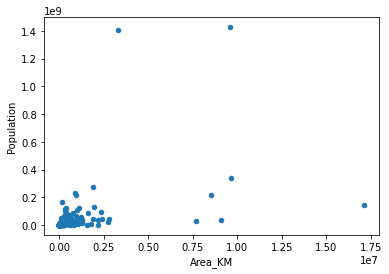

In [8]:
# Problem 5
# 
dataframe.plot.scatter(x = 'Area_KM', y = 'Population')